In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(8)

Using TensorFlow backend.
/Users/gracelee/.pyenv/versions/3.5.4/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv('./diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
len(dataset)

768

In [4]:
features = dataset[dataset.columns[:-1]].values
labels = dataset[dataset.columns[-1]].values

In [5]:
x_train = features[:700]
y_train = labels[:700]
x_test = features[700:]
y_test = labels[700:]

In [6]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


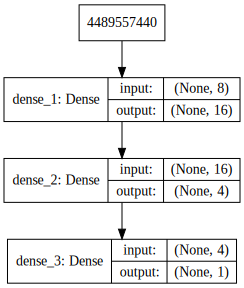

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
hist = model.fit(x_train, y_train, epochs=1500, batch_size=64, verbose=0)

In [10]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[3.8955169078281946, 3.282035289491926, 3.1680818380628315, 3.140174775804792, 3.1179934651511054, 3.0819874954223634, 2.981800162451608, 2.386471556254796, 1.1497511393683297, 0.7632220997129168, 0.7023320879255023, 0.6870326771054949, 0.680830727645329, 0.6792141727038792, 0.6764522426468985, 0.6739154992784773, 0.6716943447930472, 0.6681310994284494, 0.6663315776416233, 0.6638739960534232, 0.6622639407430376, 0.6618799100603376, 0.660757678917476, 0.6602818638937814, 0.6589206869261606, 0.6579480382374355, 0.657018027646201, 0.6562280372210911, 0.6549722504615784, 0.6540598518507821, 0.653118097441537, 0.6525077322551183, 0.6508351714270455, 0.6493999096325466, 0.6484250017574855, 0.6469270740236555, 0.6459935620852879, 0.6457342859676906, 0.6445598592076983, 0.6436317951338631, 0.6424879162652152, 0.6414545355524336, 0.6408519942419869, 0.6403853300639561, 0.6393712183407375, 0.6384935467583792, 0.6380710959434509, 0.6367264550072806, 0.6360397454670498,

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7401641589753768
Test accuracy: 0.75
